## setup

In [270]:
# suppress warnings
import warnings
warnings.simplefilter('ignore')

#import packages
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import subprocess
from datetime import datetime


#local imports from opensoundscape
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram
from opensoundscape.ribbit import ribbit

# create big visuals
plt.rcParams['figure.figsize']=[15,8]
pd.set_option('display.precision', 2)

## read in RIBBIT scores and basic cleaning 

In [271]:
# folder with ribbit scores of interest
ribbit_folder = "ribbit_scores_2022_01_21"

#creates list of all cdv ribbit files to concatonate into one df of all ribbit scores
all_files = glob(ribbit_folder + "/*.csv")
ribbit_list = []

# reads in all ribbit scores to csv 
for filename in all_files: 
    df = pd.read_csv("./" + filename)
    ribbit_list.append(df)
    
rs_df = pd.concat(ribbit_list, axis=0, ignore_index=True) # translates list into dataframe 

rs_df = rs_df.rename(columns={"Unnamed: 0" : "file_path"})

# use file_path to create column with date and time of file 
rs_df['date'] = pd.to_datetime(rs_df.file_path.str[-19:-4], format='%Y%m%d_%H%M%S', errors='coerce')

# add in manually determined files
tr_df = pd.read_csv("./training_data.csv")
rs_df = pd.merge(rs_df, tr_df, on=['pond', 'file_path'], how = "left")
# todo: add that if file starts with "Lcapito", Lcapito = 1

In [272]:
rs_df

,file_path,score,year,pond,time_stamp,date,Lcapito
0,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2018/FLSHE_2018_400/TEST_0+1_20180216_232400.wav,245.69,2018,400,160.0,2018-02-16 23:24:00,NaN
1,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2018/FLSHE_2018_400/TEST_0+1_20180212_202000.wav,222.13,2018,400,137.0,2018-02-12 20:20:00,NaN
2,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2018/FLSHE_2018_400/TEST_0+1_20180215_192300.wav,146.65,2018,400,299.0,2018-02-15 19:23:00,NaN
3,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2018/FLSHE_2018_400/TEST_0+1_20180209_211700.wav,132.77,2018,400,189.0,2018-02-09 21:17:00,NaN
4,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2018/FLSHE_2018_400/TEST_0+1_20180210_011700.wav,117.46,2018,400,84.0,2018-02-10 01:17:00,NaN
...,...,...,...,...,...,...,...
65299,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_398/TEST_0+1_20200313_204400.wav,22.20,2020,398,212.0,2020-03-13 20:44:00,NaN
65300,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_398/TEST_0+1_20200222_012700.wav,21.97,2020,398,102.0,2020-02-22 01:27:00,NaN
65301,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_398/TEST_0+1_20200123_020000.wav,21.70,2020,398,41.0,2020-01-23 02:00:00,NaN
65302,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2020/FLSHE_2020_398/TEST_0+1_20200130_010700.wav,21.21,2020,398,97.0,2020-01-30 01:07:00,NaN


## plotting ribbit scores

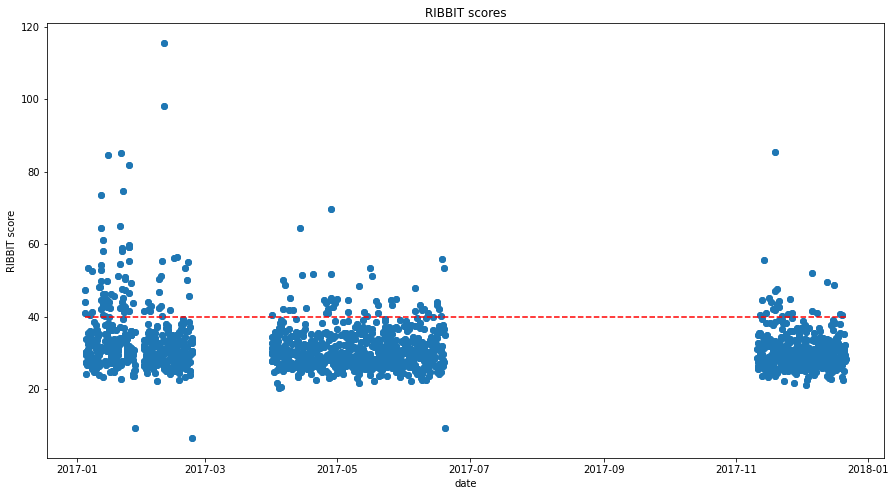

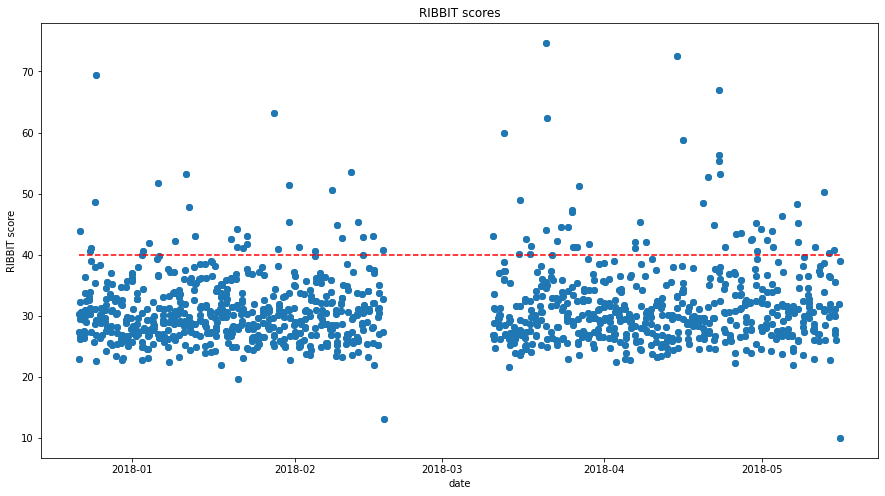

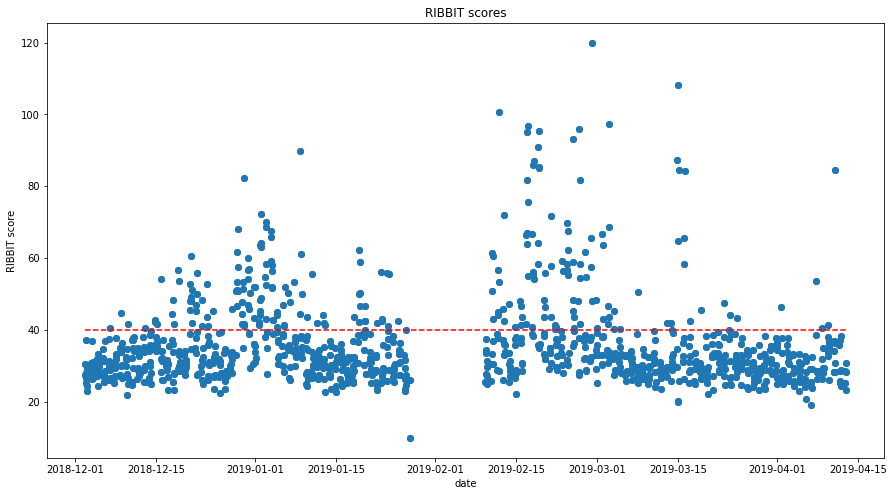

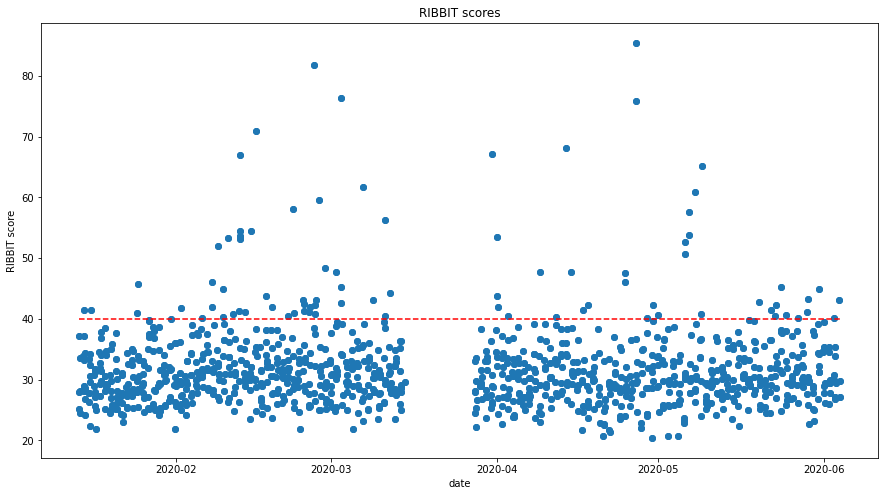

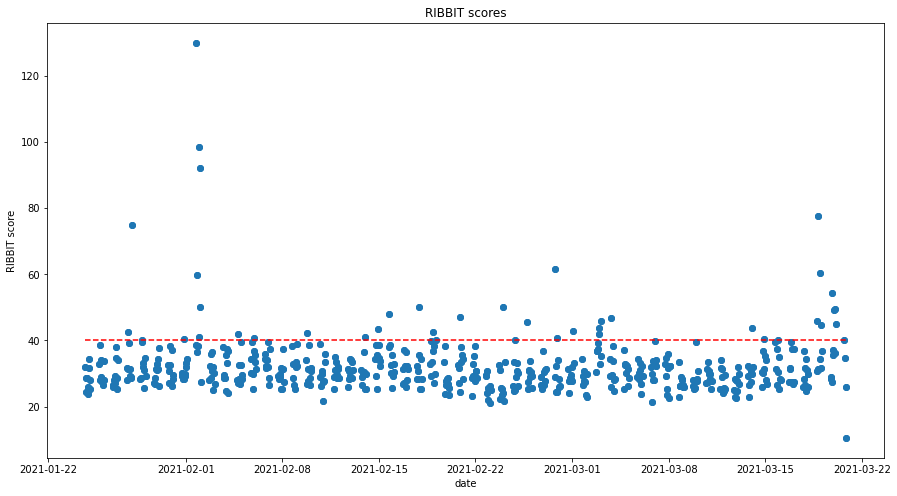

In [278]:
def plot_rs(pond_no = "all", year = "all"):
    
    plot_data = rs_df

    if pond_no != "all":
        plot_data = plot_data[plot_data['pond'] == pond_no]

    if year != "all":
        plot_data = plot_data[plot_data['year'] == year]

        
    
    fig, ax = plt.subplots()  # a figure with a single Axes
    ax.scatter(plot_data['date'],plot_data['score'])
    ax.hlines(y = [40], xmin = plot_data.date.min(), 
              xmax = plot_data.date.max(),
             colors = 'r', linestyles = '--')
    ax.set_xlabel('date')
    ax.set_ylabel('RIBBIT score') 
    ax.set_title('RIBBIT scores')
    #ax.set_ylim(0,400)
    

for yr in range(2017,2022):
    plot_rs(pond_no = 401, year = yr)
#plot_rs(399)
#plot_rs(400)
#plot_rs(401)
#plot_rs(402)
#plot_rs(403)


In [262]:
#pd.set_option('display.max_colwidth', -1) 
rs_df[rs_df["pond"] == 398][rs_df["year"] == 2017]


,file_path,score,year,pond,time_stamp,date,Lcapito
6497,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20161105_234300.wav,93.95,2017,398,220.0,2016-11-05 23:43:00,NaN
6498,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20161106_184200.wav,68.24,2017,398,19.0,2016-11-06 18:42:00,NaN
6499,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20171113_173700.wav,63.80,2017,398,73.0,2017-11-13 17:37:00,NaN
6500,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20170201_010900.wav,59.78,2017,398,298.0,2017-02-01 01:09:00,NaN
6501,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20170121_005900.wav,57.41,2017,398,242.0,2017-01-21 00:59:00,NaN
...,...,...,...,...,...,...,...
8346,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20170404_025900.wav,20.40,2017,398,17.0,2017-04-04 02:59:00,NaN
8347,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20170121_025900.wav,19.89,2017,398,19.0,2017-01-21 02:59:00,NaN
8348,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20170619_205158.wav,17.26,2017,398,0.0,2017-06-19 20:51:58,NaN
8349,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20170223_003358.wav,15.11,2017,398,0.0,2017-02-23 00:33:58,NaN


In [264]:
rs_df[rs_df["pond"] == 398][rs_df[rs_df["pond"] == 398]['score'] > 40]

,file_path,score,year,pond,time_stamp,date,Lcapito
1113,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2018/FLSHE_2018_398/TEST_0+1_20180508_222300.wav,60.22,2018,398,232.0,2018-05-08 22:23:00,NaN
1114,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2018/FLSHE_2018_398/TEST_0+1_20180511_012500.wav,57.53,2018,398,44.0,2018-05-11 01:25:00,NaN
1115,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2018/FLSHE_2018_398/TEST_0+1_20180318_234700.wav,55.39,2018,398,138.0,2018-03-18 23:47:00,NaN
1116,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2018/FLSHE_2018_398/TEST_0+1_20180121_190000.wav,52.94,2018,398,40.0,2018-01-21 19:00:00,NaN
1117,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2018/FLSHE_2018_398/TEST_0+1_20180116_195500.wav,52.62,2018,398,6.0,2018-01-16 19:55:00,NaN
...,...,...,...,...,...,...,...
6581,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20170111_205100.wav,40.08,2017,398,174.0,2017-01-11 20:51:00,NaN
6582,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20161129_183100.wav,40.07,2017,398,284.0,2016-11-29 18:31:00,NaN
6583,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20170414_230600.wav,40.03,2017,398,182.0,2017-04-14 23:06:00,NaN
6584,/Volumes/Expansion/Frog Call Project/Calling Data/Frog Calls/FLSHE_2017/FLSHE_2017_398/TEST_0+1_20171215_003300.wav,40.01,2017,398,44.0,2017-12-15 00:33:00,NaN


In [124]:
#add pond and year columns - didnt' do this when first running RIBBIT for all years (should not have to use again)
#temp_file = all_files[29]
#temp_df = pd.read_csv(temp_file).rename(columns={"Unnamed: 0" : "file_path"}).drop("label", axis=1, errors = "ignore")
#temp_df['year'] = 2020
#temp_df['pond'] = 398
#temp_df.to_csv(temp_file, index = False)
#pd.read_csv(temp_file)